<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project Initil Data Cleaning and Explorations </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

# Introduction

In this notebook, we will embark on the crucial initial data cleaning and exploration phase. We will ensure that these datasets are in optimal condition for analysis by addressing missing values, duplicates, and unnecessary data. This process will prepare the data for the subsequent stages of our project, setting the stage for a book recommender system. This project will be built by using the following four datasets:

 - **Books Data (books.csv)**: This dataset contains detailed information about 10,000 unique books, 

- **Tags Data (tags.csv)**: This dataset contains the name and id of the tags that users can attach to books

- **Book Tags Data (book_tags.csv)**: this data set includes the number of users that have added a specific tag to a book

- **Ratings Data (ratings.csv)**: contains the user id and the rating they have given to a specific book


In [2]:
# imports usefull libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [85]:
#loading all dataframes
book_df = pd.read_csv('data/books.csv')
tags_df = pd.read_csv('data/tags.csv')
book_tags_df = pd.read_csv('data/book_tags.csv')
ratings_df = pd.read_csv('data/ratings.csv')

## Table of Content

- [Book Data Frame](#part-1)
- [Tags Data Frame](#part-2)
- [Book Tags Data Frame](#part-3)
- [Rating Data Frame](#part-4)


## Book Data Frame EDA <a class="anchor" id="part-1"></a>

To start we can take a look at the data find is shape data type and if any columns have any missing values.

In [86]:
book_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [87]:
book_df.shape

(10000, 23)

In [90]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [89]:
book_df.drop(columns=['image_url','small_image_url'],inplace = True)
book_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [8]:
book_df.drop(columns=['isbn','original_title'],inplace = True)
book_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,9.780439e+12,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,9.780316e+12,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [9]:
booke_df = pd.read_csv('data/books_enriched.csv', index_col=[0])
book_df.drop(columns=['language_code'],inplace = True)
book_df = pd.merge(book_df, booke_df[['book_id','language_code']] ,on ='book_id',how = 'left')
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn13                     9415 non-null   float64
 6   authors                    10000 non-null  object 
 7   original_publication_year  9979 non-null   float64
 8   title                      10000 non-null  object 
 9   average_rating             10000 non-null  float64
 10  ratings_count              10000 non-null  int64  
 11  work_ratings_count         10000 non-null  int64  
 12  work_text_reviews_count    10000 non-null  int64  
 13  ratings_1                  10000 non-null  int6

In [10]:
book_df[book_df['original_publication_year'].isna()][['book_id','goodreads_book_id','authors','title']]

,book_id,goodreads_book_id,authors,title
219,220,3609760,Mark Cotta Vaz,Twilight: The Complete Illustrated Movie Compa...
975,976,90072,"Robert Kapilow, Dr. Seuss","Dr. Seuss's Green Eggs and Ham: For Soprano, B..."
3505,3506,856917,Yuu Watase,"Absolute Boyfriend, Vol. 1"
4228,4229,36,"Chris Smith, Christopher Lee, Richard Taylor",The Lord of the Rings: Weapons and Warfare
4247,4248,8724779,"P.C. Cast, Kristin Cast",Marked / Betrayed / Chosen / Untamed / Hunted ...
4409,4410,349254,Jude Fisher,The Lord of the Rings: The Return of the King:...
4707,4708,9832370,BookRags,BookRags Summary: A Storm of Swords
4770,4771,5171894,James Rollins,"The Doomsday Key (Sigma Force, #6)"
4877,4878,17733861,Bella Forrest,"A Shade of Blood (A Shade of Vampire, #2)"
5609,5610,1044141,Stephen R. Covey,The 8th Habit: From Effectiveness to Greatness


In [11]:
book_df.loc[219,'original_publication_year'] = 2008
book_df.loc[975,'original_publication_year'] = 1996
book_df.loc[3505,'original_publication_year'] = 2003
book_df.loc[4228,'original_publication_year'] = 2003
book_df.loc[4247,'original_publication_year'] = 2009
book_df.loc[4409,'original_publication_year'] = 2003
book_df.loc[4707,'original_publication_year'] = 2010
book_df.loc[4770,'original_publication_year'] = 2009
book_df.loc[4877,'original_publication_year'] = 2013
book_df.loc[5609,'original_publication_year'] = 2004
book_df.loc[5871,'original_publication_year'] = 1858
book_df.loc[6428,'original_publication_year'] = 2006
book_df.loc[7190,'original_publication_year'] = 2010
book_df.loc[7215,'original_publication_year'] = 1982
book_df.loc[7416,'original_publication_year'] = 2012
book_df.loc[7645,'original_publication_year'] = 2000
book_df.loc[8476,'original_publication_year'] = 1974
book_df.loc[9196,'original_publication_year'] = 1939
book_df.loc[9510,'original_publication_year'] = 2009
book_df.loc[9533,'original_publication_year'] = 2007
book_df.loc[9928,'original_publication_year'] = 2009

book_df['original_publication_year'].isna().sum()

0

In [12]:
book_df.drop(columns=['isbn13'],inplace = True)
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   authors                    10000 non-null  object 
 6   original_publication_year  10000 non-null  float64
 7   title                      10000 non-null  object 
 8   average_rating             10000 non-null  float64
 9   ratings_count              10000 non-null  int64  
 10  work_ratings_count         10000 non-null  int64  
 11  work_text_reviews_count    10000 non-null  int64  
 12  ratings_1                  10000 non-null  int64  
 13  ratings_2                  10000 non-null  int6

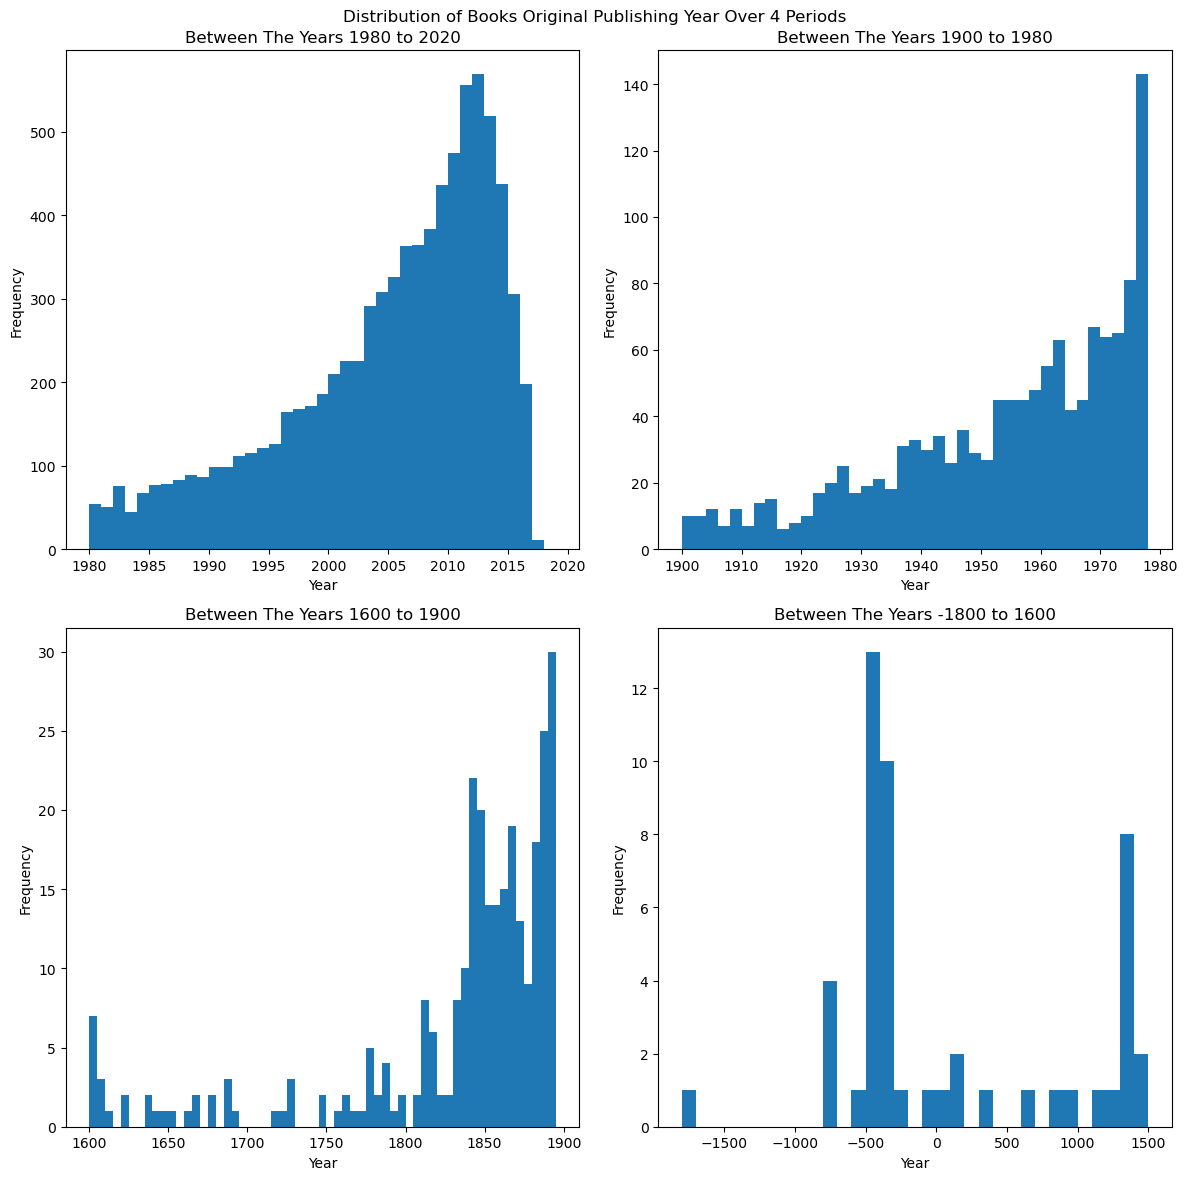

In [52]:

plt.subplots(2,2,figsize = (12,12))

plt.subplot(2,2,1)
plt.hist(book_df['original_publication_year'],bins = range(1980,2020,1))
plt.title('Between The Years 1980 to 2020')
plt.ylabel('Frequency')
plt.xlabel('Year')

plt.subplot(2,2,2)
plt.hist(book_df['original_publication_year'],bins = range(1900,1980,2))
plt.title('Between The Years 1900 to 1980')
plt.ylabel('Frequency')
plt.xlabel('Year')

plt.subplot(2,2,3)
plt.hist(book_df['original_publication_year'],bins = range(1600,1900,5))
plt.title('Between The Years 1600 to 1900')
plt.ylabel('Frequency')
plt.xlabel('Year')

plt.subplot(2,2,4)
plt.hist(book_df['original_publication_year'],bins = range(-1800,1600,100))
plt.title('Between The Years -1800 to 1600')
plt.ylabel('Frequency')
plt.xlabel('Year')


plt.suptitle('Distribution of Books Original Publishing Year Over 4 Periods')
plt.tight_layout()
plt.show()

In [16]:
book_df[book_df['authors'] == 'Brandon Sanderson'][['title','average_rating']].head(10)

,title,average_rating
388,"The Final Empire (Mistborn, #1)",4.43
561,"The Way of Kings (The Stormlight Archive, #1)",4.64
564,"The Well of Ascension (Mistborn, #2)",4.35
602,"The Hero of Ages (Mistborn, #3)",4.46
861,"Words of Radiance (The Stormlight Archive, #2)",4.77
969,"Steelheart (The Reckoners, #1)",4.16
1048,"Elantris (Elantris, #1)",4.17
1199,"The Alloy of Law (Mistborn, #4)",4.20
1664,"Warbreaker (Warbreaker, #1)",4.22
2117,"Firefight (The Reckoners, #2)",4.29


In [49]:
book_df[['authors','average_rating']].groupby('authors').mean().sort_values(['average_rating'],ascending = False).head(10)

,average_rating
authors,
"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.760000
Bill Watterson,4.710833
"Anonymous, Ronald A. Beers, Ronald A. Beers",4.670000
"Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth",4.650000
Eiichirō Oda,4.630000
Hafez,4.630000
James E. Talmage,4.630000
Angie Thomas,4.620000
Gordon B. Hinckley,4.610000


In [45]:
book_df[['title','authors','average_rating']].sort_values(['average_rating'],ascending = False).head(10)

,title,authors,average_rating
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",4.77
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77
8853,Mark of the Lion Trilogy,Francine Rivers,4.76
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73


In [46]:
book_df[['title','authors','average_rating']].sort_values(['average_rating']).head(10)

,title,authors,average_rating
1792,One Night at the Call Center,Chetan Bhagat,2.47
3549,The Almost Moon,Alice Sebold,2.67
8006,The Finkler Question,Howard Jacobson,2.76
9020,Lost,"Gregory Maguire, Douglas Smith",2.80
4008,Four Blondes,Candace Bushnell,2.80
8165,Among the Ten Thousand Things,Julia Pierpont,2.84
8873,Tell-All,Chuck Palahniuk,2.84
4282,Revenge Wears Prada: The Devil Returns (The De...,Lauren Weisberger,2.84
4613,The Emperor's Children,Claire Messud,2.93
8959,The Red House,Mark Haddon,2.93


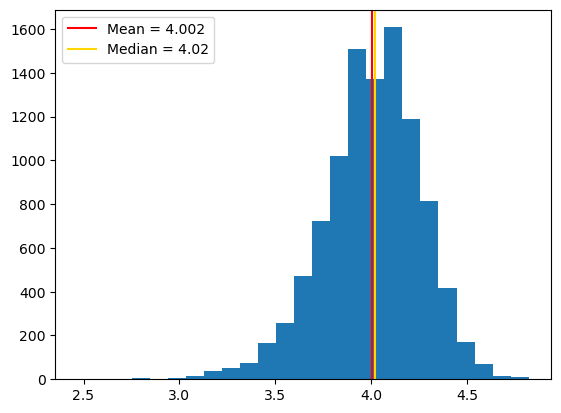

In [83]:
plt.hist(book_df['average_rating'],bins=25)
plt.axvline(book_df['average_rating'].mean(),color = 'r', label = f"Mean = {np.round(book_df['average_rating'].mean(),3)}")
plt.axvline(book_df['average_rating'].median(),color = 'gold', label = f'Median = {book_df["average_rating"].median()}')
plt.legend(loc = 'upper left')
plt.show()

## Tags Data Frame  <a class="anchor" id="part-2"></a>

In [17]:
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [18]:
tags_df.shape

(34252, 2)

In [55]:
tags_df.isna().sum()

tag_id      0
tag_name    0
dtype: int64

## Book Tags Data Frame <a class="anchor" id="part-3"></a>

In [19]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [20]:
book_tags_df.shape

(999912, 3)

In [54]:
book_tags_df.isna().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [21]:
book_tags_df['goodreads_book_id'].value_counts()

1           100
6344097     100
6338619     100
6339304     100
6339664     100
           ... 
91571       100
33288638    100
280958       94
18607805     62
22931009     56
Name: goodreads_book_id, Length: 10000, dtype: int64

In [38]:
book_tags_df2 = pd.merge(book_tags_df, tags_df, on = 'tag_id', how = 'left')
book_tags_df2 = pd.merge(book_tags_df2, book_df[['goodreads_book_id','title']], on = 'goodreads_book_id', how = 'left')

book_tags_df2.head(12)

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...
5,1,11743,9954,fiction,Harry Potter and the Half-Blood Prince (Harry ...
6,1,14017,7169,harry-potter,Harry Potter and the Half-Blood Prince (Harry ...
7,1,5207,6221,books-i-own,Harry Potter and the Half-Blood Prince (Harry ...
8,1,22743,4974,owned,Harry Potter and the Half-Blood Prince (Harry ...
9,1,32989,4364,ya,Harry Potter and the Half-Blood Prince (Harry ...


In [39]:
popul_tags = book_tags_df2['tag_name'].value_counts()/book_df.shape[0]*100

popul_tags.head(10)

to-read              99.83
favorites            98.81
owned                98.58
books-i-own          97.99
currently-reading    97.76
library              94.15
owned-books          92.21
fiction              90.97
to-buy               86.92
kindle               83.16
Name: tag_name, dtype: float64

In [42]:
book_tags_df2[['title','count']].groupby(['title']).sum().sort_values('count',ascending = False).head(10)

,count
title,
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",786374
"The Girl with the Dragon Tattoo (Millennium, #1)",679219
The Alchemist,675971
All the Light We Cannot See,600025
Les Misérables,597465
"Cinder (The Lunar Chronicles, #1)",558626
Catch-22,528331
Slaughterhouse-Five,515032
Gone with the Wind,504185


## Ratings Data Frame <a class="anchor" id="part-4"></a>

In [25]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [26]:
ratings_df.shape

(5976479, 3)

In [53]:
ratings_df.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [56]:
ratings_df.duplicated().sum()

0

In [28]:
ratings_df['rating'].value_counts()

4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: rating, dtype: int64

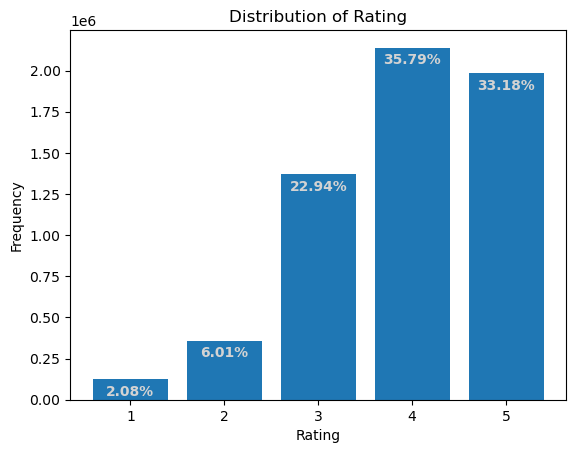

In [29]:
rat_cnt = ratings_df['rating'].value_counts().sort_index(ascending = False)
plt.bar(rat_cnt.index,rat_cnt.values)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')
for i in range(5):
    pos = rat_cnt.values[i]-100000
    pct = np.round(rat_cnt.values[i]/ratings_df.shape[0]*100,2)
    plt.text(5-i, pos, f'{pct}%', ha = 'center',color = 'lightgrey',weight="bold")
plt.show()